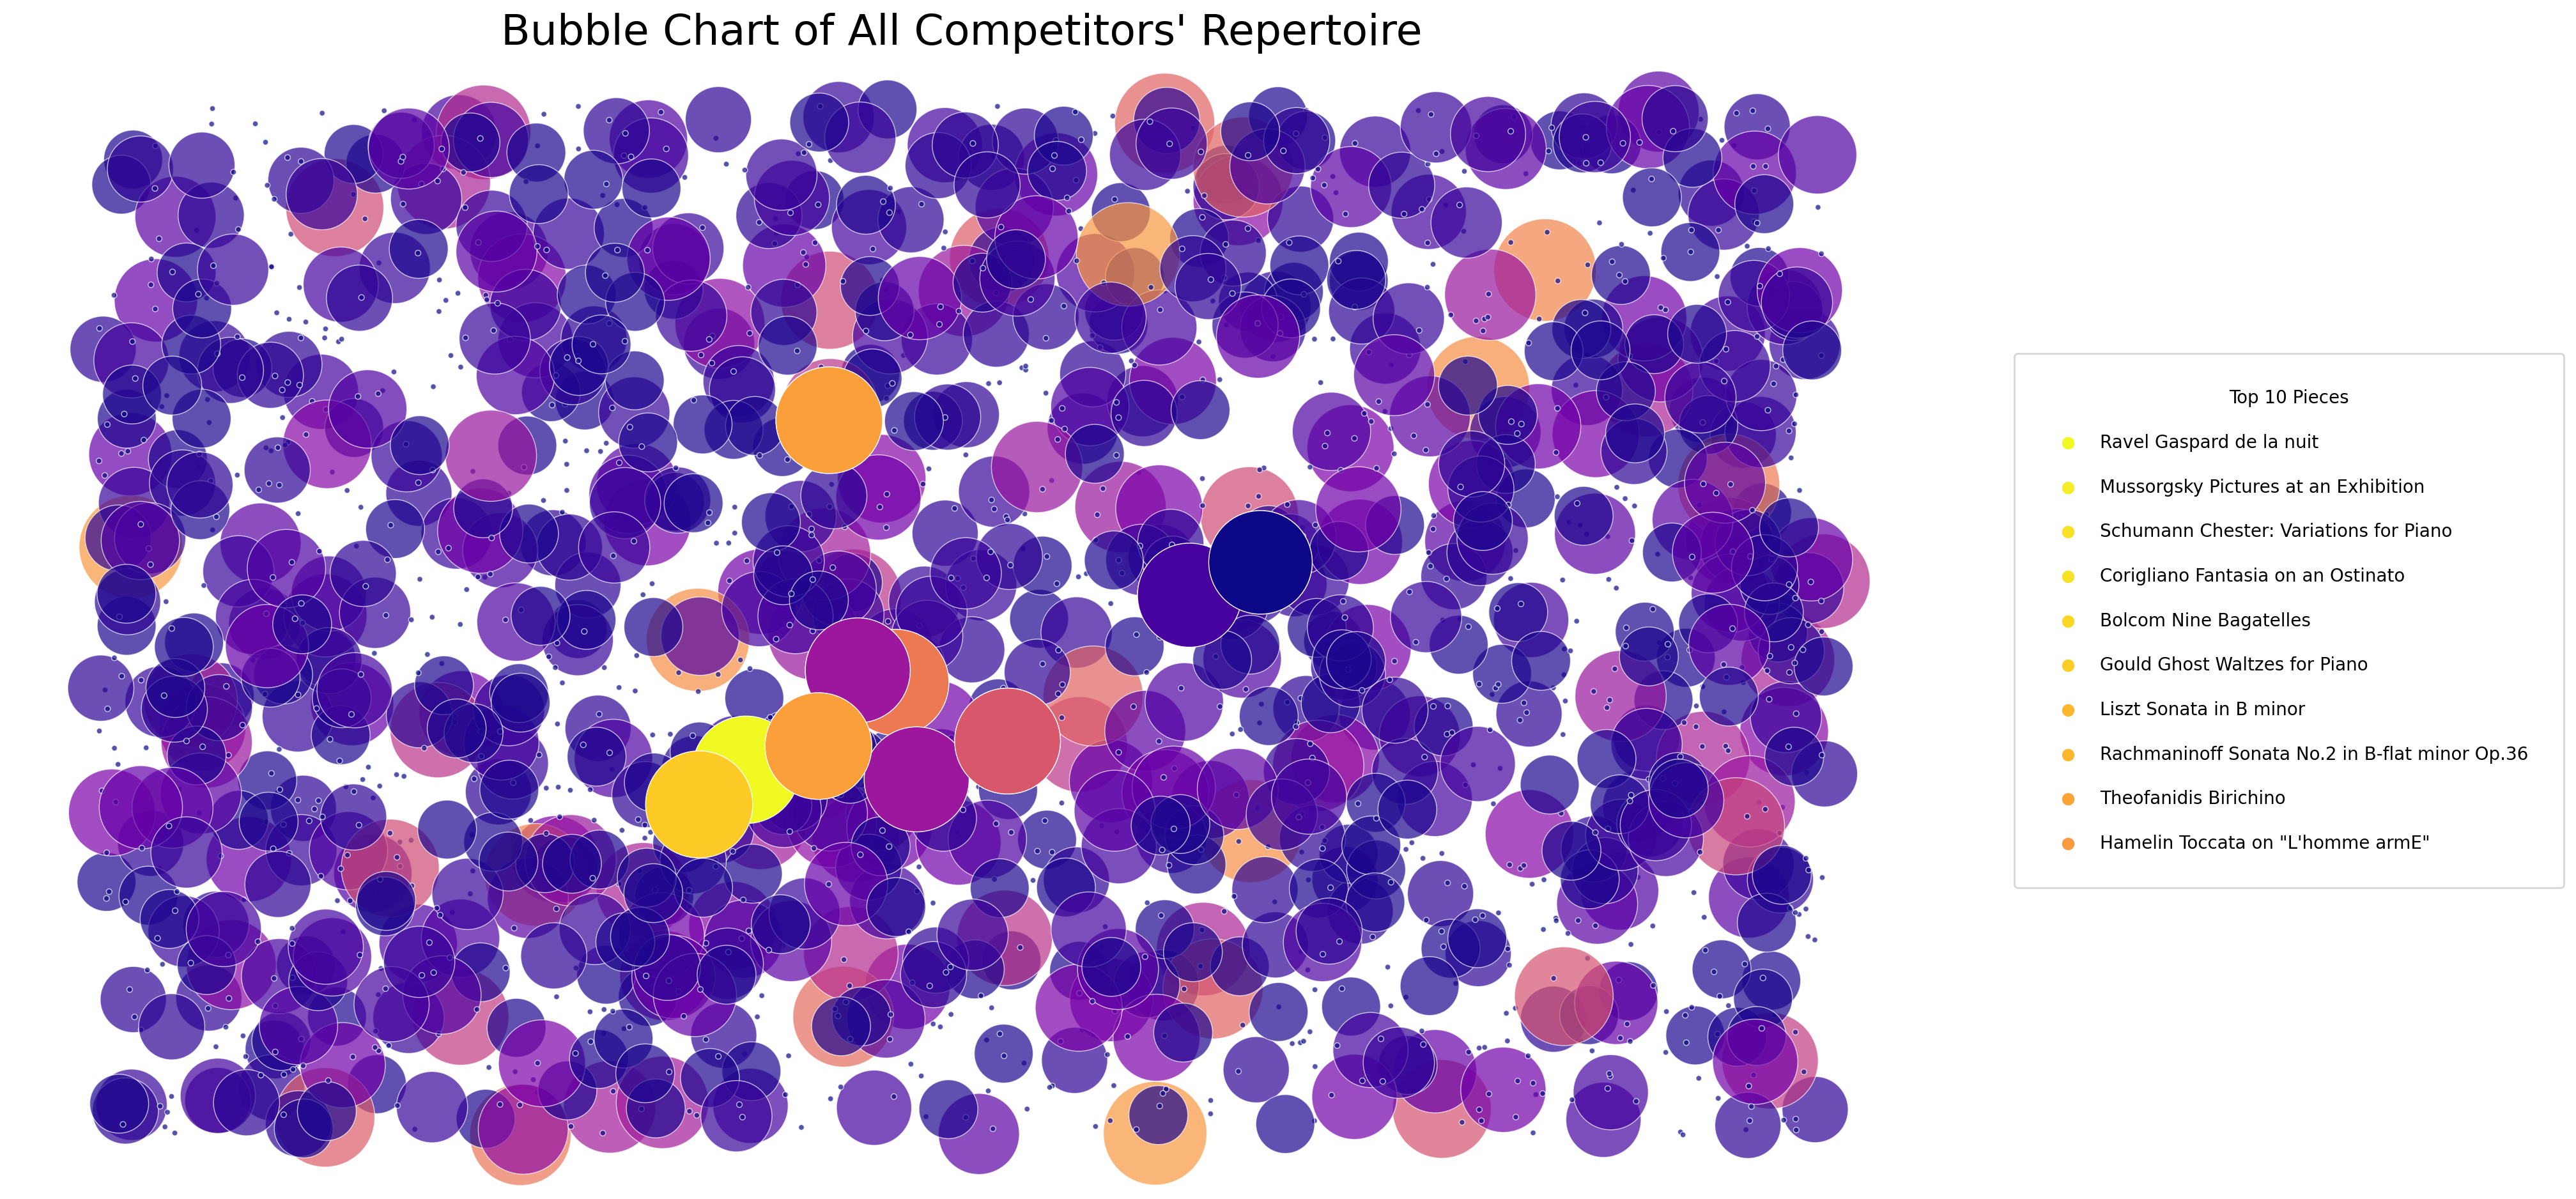

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import matplotlib.cm as cm

df = pd.read_excel('Competition Final List.xlsx')
df['Combined'] = df['Composer'] + ' ' + df['Piece']

df.to_excel('combined_columns.xlsx', index=False)

df = pd.read_excel('combined_columns.xlsx')
pieces = df['Combined'].dropna().tolist()

# Exclude pieces with 'Concerto' or 'Quintet' in their name
filtered_pieces = [piece for piece in pieces if 'Concerto' not in piece and 'Quintet' not in piece]

piece_counts = Counter(filtered_pieces)
data = pd.DataFrame(piece_counts.items(), columns=['Piece', 'Count'])
top_10_data = data.sort_values(by='Count', ascending=False).head(10)

center_x = np.random.uniform(0.3, 0.7, len(top_10_data))
center_y = np.random.uniform(0.3, 0.7, len(top_10_data))
np.random.seed(0)
x_pos = np.random.rand(len(data))
y_pos = np.random.rand(len(data))

x_pos[data['Piece'].isin(top_10_data['Piece'])] = center_x
y_pos[data['Piece'].isin(top_10_data['Piece'])] = center_y

fig, ax = plt.subplots(figsize=(10, 6), dpi=200)

size_factor = np.where(data['Count'] == 1, 10, np.log(data['Count'] + 1) * 1000)
cmap = plt.cm.plasma

scatter = ax.scatter(x_pos, y_pos, s=size_factor, c=data['Count'], cmap=cmap, alpha=0.7, edgecolors="w", linewidth=0.5, zorder=0)
top_10_scatter = ax.scatter(x_pos[data['Piece'].isin(top_10_data['Piece'])], 
                            y_pos[data['Piece'].isin(top_10_data['Piece'])], 
                            s=size_factor[data['Piece'].isin(top_10_data['Piece'])], 
                            c=data['Count'][data['Piece'].isin(top_10_data['Piece'])], 
                            cmap=cmap, alpha=1.0, edgecolors="w", linewidth=0.5, zorder=1)

for i, row in top_10_data.iterrows():
    ax.scatter([], [], color=cmap(row['Count'] / max(data['Count'])), label=row['Piece'], zorder=1)

ax.legend(title="Top 10 Pieces", bbox_to_anchor=(1.05, 0.5), loc='center left', 
          borderpad=2, labelspacing=1.5, handlelength=2, fontsize=10)

ax.set_title('Bubble Chart of All Competitors\' Repertoire', fontsize=24)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
fig.subplots_adjust(right=1.5)
fig.subplots_adjust(top=1.5)
plt.show()

